# IMPORT LIBRARIES

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORT DATA

In [82]:
# read the datasets
train_source = pd.read_csv('./data/training_set.csv')
test_source = pd.read_csv('./data/testing_set.csv')

In [83]:
# see the size of the datasets
train_source.shape, test_source.shape

((3509, 8), (1500, 7))

In [84]:
train_source.head()

,train_idx,Time,Open,High,Low,Close,Volume,label
0,0,2007-03-07 00:00:00,1.31258,1.31844,1.31086,1.31648,1807377.0,0
1,1,2007-03-08 00:00:00,1.31667,1.31813,1.31154,1.31396,1995920.0,1
2,2,2007-03-09 00:00:00,1.31396,1.31583,1.30864,1.31118,1859100.0,1
3,3,2007-03-11 00:00:00,1.31236,1.31415,1.31068,1.31175,192381.0,1
4,4,2007-03-12 00:00:00,1.31193,1.31992,1.31054,7.90878,2009286.0,1


In [85]:
test_source.head()

,test_idx,Time,Open,High,Low,Close,Volume
0,0,2018-05-29 00:00:00,1.16271,1.16394,1.15099,1.15343,336090
1,1,2018-05-30 00:00:00,1.15342,1.16759,1.15186,1.16627,318421
2,2,2018-05-31 00:00:00,1.16627,1.17243,1.16410,1.16938,285788
3,3,2018-06-01 00:00:00,1.16937,1.17178,1.16170,1.16584,253533
4,4,2018-06-03 00:00:00,1.16561,1.16794,1.16561,1.16757,14803


In [86]:
train_source.describe()

,train_idx,Open,High,Low,Close,Volume,label
count,3509.000000,3491.000000,3453.000000,3442.000000,3470.000000,3.481000e+03,3509.000000
mean,1754.000000,1.315917,1.308379,1.298522,1.309465,2.793843e+05,0.499858
std,1013.105375,0.463695,0.361848,0.367142,0.406838,2.995125e+05,0.500071
min,0.000000,0.136331,0.133119,0.133926,0.132743,4.970000e+02,0.000000
25%,877.000000,1.181970,1.184600,1.176797,1.181277,8.122800e+04,0.000000
50%,1754.000000,1.313140,1.318720,1.307255,1.313005,1.912090e+05,0.000000
75%,2631.000000,1.376900,1.381560,1.372110,1.376593,2.699740e+05,1.000000
max,3508.000000,12.604500,11.522790,10.871280,10.877040,2.693602e+06,1.000000


In [87]:
test_source.describe()

,test_idx,Open,High,Low,Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,749.500000,1.125877,1.129278,1.122566,1.125837,2.374014e+05
std,433.157015,0.056683,0.056129,0.057152,0.056673,2.305794e+05
min,0.000000,0.956940,0.967070,0.953570,0.956880,2.343000e+03
25%,374.750000,1.095598,1.099522,1.092465,1.095330,8.010825e+04
50%,749.500000,1.130070,1.133030,1.126825,1.129860,1.947670e+05
75%,1124.250000,1.169507,1.173942,1.166930,1.169610,3.249358e+05
max,1499.000000,1.233240,1.234940,1.226550,1.233240,2.997191e+06


In [88]:
# see the dates maximim and minimum of the train and test datasets
print("Train: ", train_source["Time"].min(), train_source["Time"].max()) 
print("Test: ", test_source["Time"].min(), test_source["Time"].max()) 

Train:  2007-03-07 00:00:00 2018-05-23 00:00:00
Test:  2018-05-29 00:00:00 2023-03-14 00:00:00


# DUPLICATES

In [89]:
# looking for duplicates
train_source.duplicated().sum()

0

In [90]:
test_source.duplicated().sum()

0

# NULL VALUES

Like we can see, there are missing values in several variables

In [91]:
# miramos si los datos tienen valores nulos
train_source.isnull().sum()

train_idx     0
Time          0
Open         18
High         56
Low          67
Close        39
Volume       28
label         0
dtype: int64

In [92]:
# calculate the percentage of null values
train_source.isnull().sum() / len(train_source) * 100

train_idx    0.000000
Time         0.000000
Open         0.512967
High         1.595896
Low          1.909376
Close        1.111428
Volume       0.797948
label        0.000000
dtype: float64

First we delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume", if there´s any.

In [93]:
# delete the rows with null values in the columns: "Open", "High", "Low", "Close", "Volume"
train = train_source.dropna(subset=["Open", "High", "Low", "Close", "Volume"], how='all')

In [94]:
# however there are no rows with the previous columns with null values
train_source.shape, train.shape

((3509, 8), (3509, 8))

**Now we must fill the missing values somehow**

Care must be taken with the look forward bias for imputation methods. *Look ahead bias* is a type of bias that occurs when a study or simulation relies on data or information that was not yet available or known during the time period being studied. It generally leads to inaccurate results from a study or simulation.

One of the possible methods is interpolation, that assumes a linear relationship (or not lineal, depends on the relation between the variables) between data points and utilises non-missing values from adjacent data points (past and future) to compute a value for a missing data point. Therefore, we reject this method because of the use of look ahead bias.. For that reason we will look for a way to avoid it.

Bearing the above mentioned in mind and the computational resources that we have, there can be several approaches to deal with the null values:

1. Remove the null values.

2. Fill the null values with the value of the previous day.

3. Fill the null values with the total average or moving average.

4. Fill in the null values by adding the value of the row with the average of the variation of the last 10 days. In other words, if we have a null value on December 11, we would calculate the average of the variations of the previous 10 days. That is, if December 1 has a value of 2, December 2 has a value of 3 and so on until the 10th, we have an average variation of 1 ((1+1+1+1+ 1+1+1+1+1+1)/10). Then we would add this variation to the value of row 11.
This method could be useful due to the samll amount of missing values. However, it assumes that the data are stationary and that the variability of the data remains constant over time. It may not be suitable if the data have a trend or seasonality, as it may introduce biases in the imputation.

5. Bayesian posterior consensus distribution that optimally controls the trade-off between look-ahead bias and variance in the imputation. Combine multiple plausible imputations using Bayesian model averaging. It only uses past information data.
This method is more sophisticated and takes into account the uncertainty and prior knowledge in the data. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using a Bayesian approach. This method does not require future data and therefore, avoids look-ahead bias.

6. Wasserstein Interpolation: interpolate probability distributions. The method seeks to find an intermediate distribution between two given distributions that minimizes the wasserstein distance, which measures the minimum **work** required to transform one distribution into the other.
This method is suitable for continuous data and assumes that the data have a probabilistic structure. It could be a good choice if the missing data are non-random and the patterns in the data can be modeled using probability distributions (like the previous one). It neither require future data, avoiding look-ahead bias.

For the ***Open*** and ***Close*** variables, it may make more sense to use method 4, which involves filling in the null values by adding the value of the row with the average of the variation of the last 10 days. This is because these variables are directly related to the start and end of a trading period, and using past information to fill in the missing values can help preserve the temporal structure of the data.


On the other hand, the Bayesian posterior consensus and Wasserstein Interpolation methods are more suited for cases where the missing values are not as temporally dependent, and where incorporating prior knowledge and uncertainty may be more useful. For the ***High***, ***Low***, and ***Volume*** variables, these methods may be more appropriate, as they are not as directly tied to the start and end of a trading period, and incorporating uncertainty and prior knowledge can help fill in the missing values in a more robust and accurate manner.

Like we can see on the scatter plot below between Time and High/Low, we have a narrow range of values (between 0 and 2) and a few outliers. Therefore the Bayesian method could be a suitable choice for imputing missing values on this columns. This is because the Bayesian method is known for its ability to handle small samples sizes and constrained data ranges, which are characteristics of the data. Additionally the Bayesian method can provide a posterior distribution that reflects the uncertainity in the imputed values, which can be useful for downstream analysis.

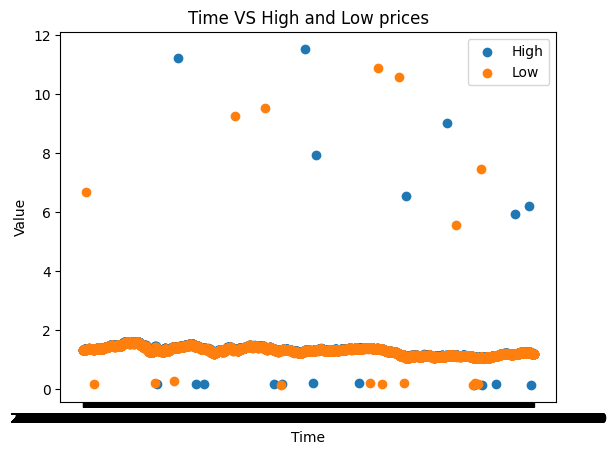

In [95]:
# do a scatter plot between the columns "Time" and "High" 
plt.scatter(train["Time"], train["High"]), plt.scatter(train["Time"], train["Low"])
# incorporate the labels and title and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time VS High and Low prices")
plt.legend(["High", "Low"])

Having chosen the third option for the columns ***Open*** and ***Close***, we will iterate over every row in the DataFrame, and for any row with a null value in the column, it will look at the previous 10 days values, ignore any null values, and calculate the average variation. It will then fill in the null value with the previous day's "Open" and "Close" value plus the average variation.

In [96]:
''' 
Function to fill especifically the null values of the columns "Open" and "Close" by calcultaing the average variation of the previous 10 days 
and adding it to the previous day value of the column
'''
def fill_na_with_variation(df, column):
    for i in range(10, len(df)):
        if pd.isna(df.loc[i, column]): # check if the value is null
            previous = df.loc[i-10:i-1, column] # get the previous 10 values
            previous_not_null = previous[~previous.isnull()] # get the previous values that are not null
            if not previous_not_null.empty: # check if there are previous values that are not null
                avg_variation = (previous_not_null.diff().mean(skipna=True)) # calculate the average variation
                df.loc[i, column] = df.loc[i-1, column] + avg_variation # fill the null value with the previous value plus the average variation
            else: # if the previous 10 days has also null values
                df.loc[i, column] = df.loc[i-1, column] # fill the null value with the previous value
    return df

In [97]:
train_cleaned = fill_na_with_variation(train, "Open")
train_cleaned = fill_na_with_variation(train_cleaned, "Close")

In [98]:
train_cleaned.isnull().sum()

train_idx     0
Time          0
Open          0
High         56
Low          67
Close         0
Volume       28
label         0
dtype: int64

As we mentioned above for the ***High*** and ***Low*** columns we will use the Bayesian method.

In [99]:
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer

# Select the columns to fill null values in
cols_to_impute = ['High', 'Low', "Volume"]

# Create a Bayesian Ridge model and a SimpleImputer instance
model = BayesianRidge()
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(train_cleaned[cols_to_impute])

# Transform the training data to fill null values
train_cleaned[cols_to_impute] = imputer.transform(train_cleaned[cols_to_impute])

In [100]:
train_cleaned.isnull().sum()

train_idx    0
Time         0
Open         0
High         0
Low          0
Close        0
Volume       0
label        0
dtype: int64

The **test** dataset does not have null values

In [101]:
test_source.isnull().sum()

test_idx    0
Time        0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

# OUTLIERS

In [14]:
# miramos si los datos tiene valores atípicos con gráficos


# REFERENCES

* [What is Look-ahead Bias?](https://corporatefinanceinstitute.com/resources/capital-markets/look-ahead-bias/#:~:text=What%20is%20Look%2Dahead%20Bias,from%20a%20study%20or%20simulation.)
* [Interpolation calculation made ez](https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf)
* [Forward Filtering Backwards Sampling (FFBS) and Look-Ahead Bias](https://stats.stackexchange.com/questions/110944/forward-filtering-backwards-sampling-ffbs-and-look-ahead-bias)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Tradeoff](https://arxiv.org/abs/2102.12736)
* [Time-Series Imputation with Wasserstein Interpolation for Optimal Look-Ahead-Bias and Variance Trade](https://www.madrasresearch.org/post/time-series-imputation-with-wasserstein-interpolation-for-optimal-look-ahead-bias-and-variance-trade)